In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import cv2
from google.colab.patches import cv2_imshow

In [0]:
# membaca image
im_path = "/content/drive/My Drive/Colab Notebooks/Image Fundamental/"
image = cv2.imread(im_path + "car.jpg")

In [0]:
# menampilkan image
cv2_imshow(image)

In [0]:
# mendapatkan dimensi image
print(image.shape)

In [0]:
# mengakses nilai di pixel x=100, y=20
(b, g, r) = image[20, 100]
print("blue = ",b)
print("green = ",g)
print("red = ",r)

blue =  74
green =  91
red =  112


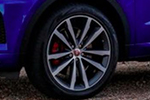

(100, 150, 3)


In [0]:
# crop image
im_crop = image[300:400, 200:350]
cv2_imshow(im_crop)
print(im_crop.shape)

In [0]:
# mengcopy image
cp_image = image.copy()
print(cp_image.shape)

(475, 660, 3)


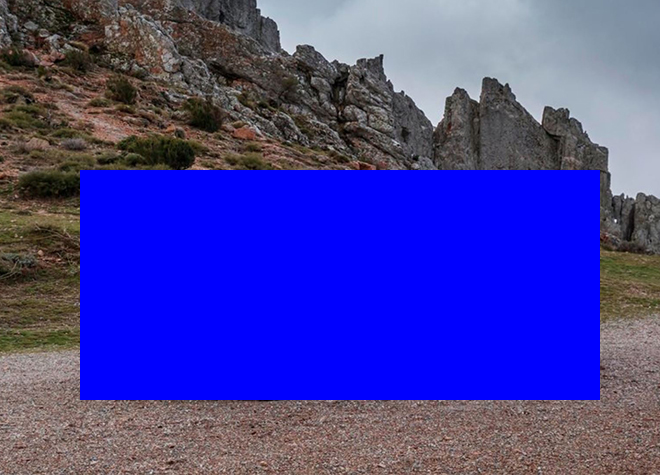

In [0]:
# mengubah nilai pixel
cp_image[170:400, 80:600] = (255, 0, 0)

cv2_imshow(cp_image)

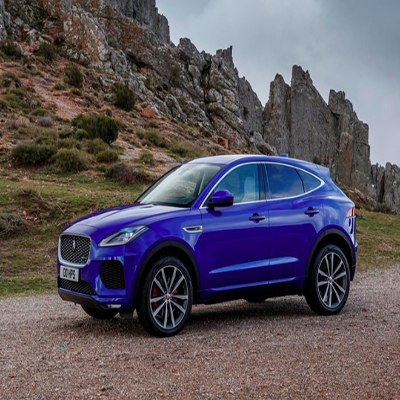

In [0]:
# resize image (ignore aspect ratio)
im_resized = cv2.resize(image, (400,400))
cv2_imshow(im_resized)

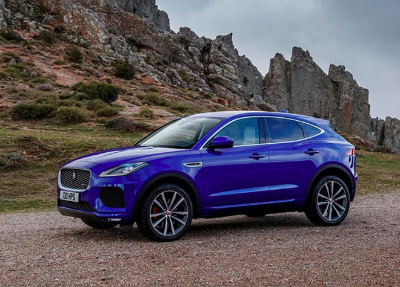

In [0]:
# resize image (mempertahankan aspect ratio)
r = 400/image.shape[1]
dim = (400,int(image.shape[0]*r))
im_resized = cv2.resize(image, dim)
cv2_imshow(im_resized)

In [0]:
im_resized.shape

(287, 400, 3)

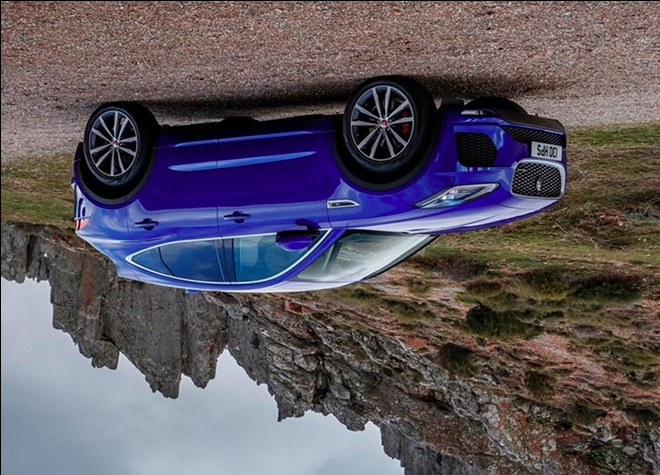

In [0]:
# Rotating an image
(h, w) = image.shape[:2]
center = (w/2, h/2)

M = cv2.getRotationMatrix2D(center, 180, 1.0)
rotated = cv2.warpAffine(image, M, (w,h))
cv2_imshow(rotated)

In [0]:
# menyimpan image
cv2.imwrite("wheel.png", im_crop)

True

# Use PIL Library

In [0]:
from PIL import Image 

In [0]:
img = Image.open(im_path + "stempel.png")
img = img.convert("RGBA")
data = img.getdata()

In [0]:
newData = []
for item in data:
    if item[0] >= 200 and item[1] >= 200 and item [2] >= 200:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)
        
img.putdata(newData)
img.save("img_trans.png", "PNG")

# Color Transfer

In [0]:
import numpy as np

In [0]:
def im_resize(image):
  r = 300/image.shape[1]
  dim = (300,int(image.shape[0]*r))
  im_resized = cv2.resize(image, dim)
  return (im_resized)

In [0]:
def image_stats(image):
  # compute the mean and standard deviation of each channel
  (l, a, b) = cv2.split(image)
  (lMean, lStd) = (l.mean(), l.std())
  (aMean, aStd) = (a.mean(), a.std())
  (bMean, bStd) = (b.mean(), b.std())
  
  # return the color statistics
  return (lMean, lStd, aMean, aStd, bMean, bStd)

In [0]:
def color_transfer(source, target):
  source = cv2.cvtColor(source, cv2.COLOR_BGR2LAB).astype("float32")
  target = cv2.cvtColor(target, cv2.COLOR_BGR2LAB).astype("float32")
  
  # compute color statistics for the source and target images
  (lMeanSrc, lStdSrc, aMeanSrc, aStdSrc, bMeanSrc, bStdSrc) = image_stats(source)
  (lMeanTar, lStdTar, aMeanTar, aStdTar, bMeanTar, bStdTar) = image_stats(target)
  
  # subtract the means from the target image
  (l, a, b) = cv2.split(target)
  l -= lMeanTar
  a -= aMeanTar
  b -= bMeanTar
  
  # scale by the standard deviations
  l = (lStdTar / lStdSrc) * l
  a = (aStdTar / aStdSrc) * a
  b = (bStdTar / bStdSrc) * b
  
  # add in the source mean
  l += lMeanSrc
  a += aMeanSrc
  b += bMeanSrc
  
  # clip the pixel intensities to [0, 255] if they fall outside this range
  l = np.clip(l, 0, 255)
  a = np.clip(a, 0, 255)
  b = np.clip(b, 0, 255)
  
  # merge the channels together and convert back to the RGB color
  # space, being sure to utilize the 8-bit unsigned integer data type
  transfer = cv2.merge([l, a, b])
  transfer = cv2.cvtColor(transfer.astype("uint8"), cv2.COLOR_LAB2BGR)
  
  # return the color transferred image
  return transfer

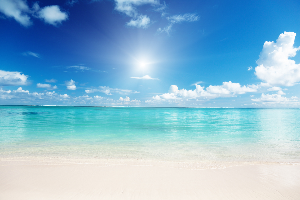

Beach


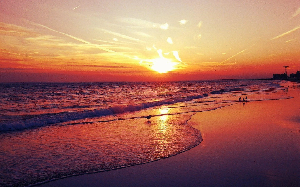

Sunset


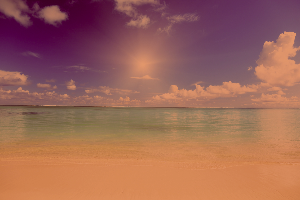

Color Transfered sunset to beach


In [0]:
source = cv2.imread(im_path + "sunset.jpg")
target = cv2.imread(im_path + "beach.jpg")

transfer = color_transfer(source, target)

beach = im_resize(target)
sunset = im_resize(source)
trans = im_resize(transfer)
cv2_imshow(beach)
print("Beach")
cv2_imshow(sunset)
print("Sunset")
cv2_imshow(trans)
print("Color Transfered sunset to beach")